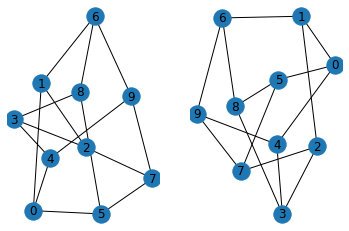

In [2]:
import networkx as nx
import dgl

g_nx = nx.petersen_graph()
g_dgl = dgl.DGLGraph(g_nx)

import matplotlib.pyplot as plt
plt.subplot(121)
nx.draw(g_nx, with_labels=True)
plt.subplot(122)
nx.draw(g_dgl.to_networkx().to_undirected(), with_labels=True)

plt.show()

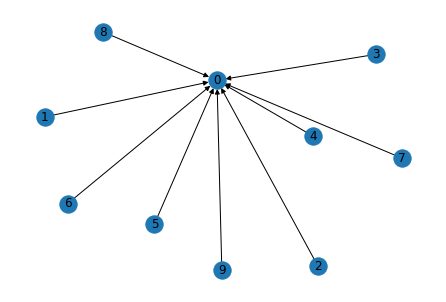

In [13]:
import torch as th

g = dgl.DGLGraph()
g.add_nodes(10)
# A couple edges one-by-one
for i in range(1, 4):
    g.add_edge(i, 0)
# A few more with a paired list
src = list(range(5, 8)); dst = [0]*3
g.add_edges(src, dst)
# finish with a pair of tensors
src = th.tensor([8, 9]); dst = th.tensor([0, 0])
g.add_edges(src, dst)

# Edge broadcasting will do star graph in one go!
g.clear(); g.add_nodes(10)
src = th.tensor(list(range(1, 10)));
g.add_edges(src, 0)

# Visualize the graph.
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

In [14]:
x = th.randn(10, 3)
print(x)
print(g.ndata)
g.ndata['x'] = x

tensor([[ 1.6407,  0.2741, -0.5164],
        [-0.4560,  0.4484,  1.4164],
        [ 0.2662, -0.7284, -0.9407],
        [ 1.2106,  1.7009,  1.9327],
        [ 0.1497, -1.1122, -1.2338],
        [-0.1048, -0.5015, -0.0292],
        [ 0.9861,  1.5071,  0.5275],
        [ 0.0229,  0.1403,  0.3102],
        [ 0.4776, -0.2376,  0.8054],
        [-1.2434, -0.7949,  1.2011]])
{}


In [15]:
g.ndata['x'][0] = th.zeros(1, 3)
print(g.ndata['x'])
g.ndata['x'][[0, 1, 2]] = th.zeros(3, 3)
print(g.ndata['x'])
g.ndata['x'][th.tensor([0, 1, 2])] = th.randn((3, 3))
print(g.ndata['x'])

tensor([[ 0.0000,  0.0000,  0.0000],
        [-0.4560,  0.4484,  1.4164],
        [ 0.2662, -0.7284, -0.9407],
        [ 1.2106,  1.7009,  1.9327],
        [ 0.1497, -1.1122, -1.2338],
        [-0.1048, -0.5015, -0.0292],
        [ 0.9861,  1.5071,  0.5275],
        [ 0.0229,  0.1403,  0.3102],
        [ 0.4776, -0.2376,  0.8054],
        [-1.2434, -0.7949,  1.2011]])
tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2106,  1.7009,  1.9327],
        [ 0.1497, -1.1122, -1.2338],
        [-0.1048, -0.5015, -0.0292],
        [ 0.9861,  1.5071,  0.5275],
        [ 0.0229,  0.1403,  0.3102],
        [ 0.4776, -0.2376,  0.8054],
        [-1.2434, -0.7949,  1.2011]])
tensor([[-0.2746, -0.4573, -0.3381],
        [ 1.3586, -0.1519, -0.3601],
        [-0.0126, -0.7001,  0.4647],
        [ 1.2106,  1.7009,  1.9327],
        [ 0.1497, -1.1122, -1.2338],
        [-0.1048, -0.5015, -0.0292],
        [ 0.9861,  1.5071,  0.5275],